In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
import pandas as pd
import numpy as np
import os
from os.path import join, isdir, dirname, basename, exists
from os import mkdir

import nibabel as nib

from scipy.stats import t as tdist
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(context="paper",style="white",font_scale=1.5)
from glob import glob

from collections import defaultdict, namedtuple


import matplotlib as mpl

In [3]:
eCON= '/data/bswift-1/climbach/eCON'

yoked = pd.read_excel('/data/bswift-1/Pessoa_Lab/eCON/onsetdir/CON_yoked_table.xlsx')
yoked = yoked.query('use == 1').reset_index()

In [4]:
shock_beta_path = eCON+'/dataset/results_ShockUncensored/{subj}/{group}lable/splitted_regs/ROI_analysis/noProx/buttonPress/shock_deconv/{subj}_bucket_REML_clean.1D'

In [5]:
rois = ['SupMidGyrus','Right Posterior Insula', 'Left Posterior Insula']

print('Total number of ROIs: ',len(rois))

Total number of ROIs:  3


In [6]:
response = np.loadtxt(shock_beta_path.format(subj='CON001',group='control'))[:,-24:][:,::2]
response.shape

(3, 12)

In [6]:
df = pd.DataFrame()
for i, row in yoked.iterrows():
    for group in 'control uncontrol'.split():
        response = np.loadtxt(shock_beta_path.format(subj=row[group],group=group))[:,-24:][:,::2]
        tmp_df = pd.DataFrame(response,index=rois).T
        tmp_df['Time'] = np.arange(response.shape[1])*1.25
        tmp_df['SubjID'] = row[group]
        tmp_df['Group'] = group
        tmp_df['Pair'] = 'P{:02d}'.format(i)
        df = pd.concat([df,tmp_df],axis = 0)
df = df.melt(id_vars=['Pair','Group','SubjID','Time'],var_name='ROI',value_name='Response')

In [7]:
df.head()

,Pair,Group,SubjID,Time,ROI,Response
0,P00,control,CON001,0.00,SupMidGyrus,0.053378
1,P00,control,CON001,1.25,SupMidGyrus,-0.410764
2,P00,control,CON001,2.50,SupMidGyrus,-0.216382
3,P00,control,CON001,3.75,SupMidGyrus,-0.178594
4,P00,control,CON001,5.00,SupMidGyrus,-0.499518


In [8]:
df.Time.unique().shape

(12,)

In [9]:
print('Total %d rois' %(len(list(df.ROI.unique()))))
N = len(df['Pair'].unique())
print('Total %d yoke pairs' %(N))

Total 3 rois
Total 61 yoke pairs


In [10]:
cross_subj_mean_df = df.groupby(['Time','ROI','Group'])['Response'].mean().reset_index()

from scipy.stats import sem
cross_subj_se_df = df.groupby(['Time','ROI','Group'])['Response'].agg(sem).reset_index()

In [11]:
t = cross_subj_mean_df.Time.unique()
cmap = plt.get_cmap('Set1')

In [12]:
cross_subj_mean_df.to_csv('data/07b-estmated_response.txt',
                          sep=',', float_format='%.4f',
                          index=False)

# Visualizing estimated shock responses for both groups

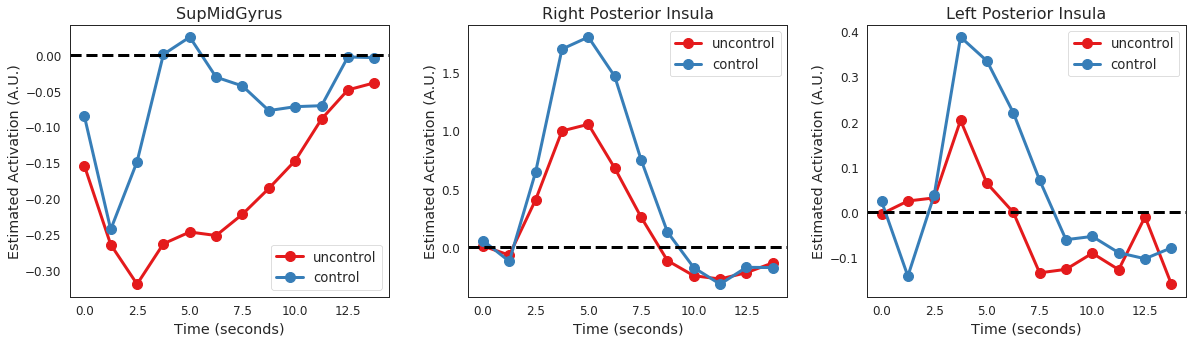

In [14]:
plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.25)
plt.subplot(1,3,1)
roi = rois[0]
uncon_mean = cross_subj_mean_df[(cross_subj_mean_df['ROI']==roi)\
                                & (cross_subj_mean_df['Group']=='uncontrol')]['Response'].values

plt.plot(t,uncon_mean, color=cmap.colors[0],linewidth=3,marker='o',label='uncontrol',markersize=10)

con_mean = cross_subj_mean_df[(cross_subj_mean_df['ROI']==roi)\
                              & (cross_subj_mean_df['Group']=='control')]['Response'].values


plt.plot(t,con_mean, color=cmap.colors[1],linewidth=3,marker='o',label='control',markersize=10)

plt.axhline(y=0,linestyle='--',linewidth=3,c='black')
plt.xticks(t[0::2],fontsize=12)
plt.yticks(fontsize=12)
plt.title(roi,fontsize=16)
plt.xlabel('Time (seconds)')
plt.ylabel('Estimated Activation (A.U.)')
plt.legend()

plt.subplot(1,3,2)
roi = rois[1]
uncon_mean = cross_subj_mean_df[(cross_subj_mean_df['ROI']==roi)\
                                & (cross_subj_mean_df['Group']=='uncontrol')]['Response'].values

plt.plot(t,uncon_mean, color=cmap.colors[0],linewidth=3,marker='o',label='uncontrol',markersize=10)

con_mean = cross_subj_mean_df[(cross_subj_mean_df['ROI']==roi)\
                              & (cross_subj_mean_df['Group']=='control')]['Response'].values


plt.plot(t,con_mean, color=cmap.colors[1],linewidth=3,marker='o',label='control',markersize=10)

plt.axhline(y=0,linestyle='--',linewidth=3,c='black')
plt.xticks(t[0::2],fontsize=12)
plt.yticks(fontsize=12)
plt.title(roi,fontsize=16)
plt.xlabel('Time (seconds)')
plt.ylabel('Estimated Activation (A.U.)')
plt.legend()

plt.subplot(1,3,3)
roi = rois[2]
uncon_mean = cross_subj_mean_df[(cross_subj_mean_df['ROI']==roi)\
                                & (cross_subj_mean_df['Group']=='uncontrol')]['Response'].values

plt.plot(t,uncon_mean, color=cmap.colors[0],linewidth=3,marker='o',label='uncontrol',markersize=10)

con_mean = cross_subj_mean_df[(cross_subj_mean_df['ROI']==roi)\
                              & (cross_subj_mean_df['Group']=='control')]['Response'].values


plt.plot(t,con_mean, color=cmap.colors[1],linewidth=3,marker='o',label='control',markersize=10)

plt.axhline(y=0,linestyle='--',linewidth=3,c='black')
plt.xticks(t[0::2],fontsize=12)
plt.yticks(fontsize=12)
plt.title(roi,fontsize=16)
plt.xlabel('Time (seconds)')
plt.ylabel('Estimated Activation (A.U.)')
plt.legend()
#plt.savefig('data/estimated_shock_response_BST.png')